In [88]:
# Critical Curve Separator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [197]:
data_crit = pd.read_csv('POW/POW_POS_crit.dat', header= None, sep="\s+")
data_crit.__dataframe__
df = data_crit.iloc[1:]
pix_size = 0.04
df = df/pix_size

In [198]:
df

,0,1,2,3,4,5,6,7
1,519.375,506.250,520.22075,518.58400,519.625,506.25,520.22250,518.59275
2,519.625,506.250,520.22250,518.59275,519.875,506.25,520.22375,518.59875
3,519.875,506.250,520.22375,518.59875,520.125,506.25,520.22475,518.60200
4,520.125,506.250,520.22475,518.60200,520.375,506.25,520.22575,518.60250
5,520.375,506.250,520.22575,518.60250,520.625,506.25,520.22700,518.60025
...,...,...,...,...,...,...,...,...
475,520.125,532.000,520.29850,519.64550,520.375,532.00,520.29950,519.64550
476,520.375,532.000,520.29950,519.64550,520.625,532.00,520.30050,519.64850
477,520.625,532.000,520.30050,519.64850,520.875,532.00,520.30175,519.65425
478,520.875,532.000,520.30175,519.65425,521.125,532.00,520.30350,519.66275


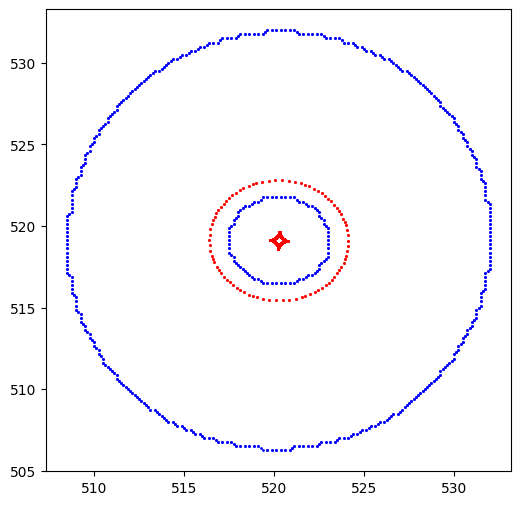

In [199]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], s=1, color = 'blue', label='Critical Curves')
plt.scatter(df[2], df[3], s=1, color = 'red', label='Caustics')
plt.scatter(df[4], df[5], s=1, color = 'blue', label='Critical Curves')
plt.scatter(df[6], df[7], s=1, color = 'red', label='Caustics')

In [200]:
for i in range(2, len(df)):

    de = df.iloc[:i]

    # Calculate the center of the points
    center_x = de[0].mean()
    center_y = de[1].mean()

    # Calculate the radius as the average distance from the center
    radius = np.sqrt((de[0] - center_x)**2 + (de[1] - center_y)**2).mean()

    # Check if all points are approximately at the same distance from the center
    tolerance = 6
    is_circle = np.all(np.abs(np.sqrt((de[0] - center_x)**2 + (de[1] - center_y)**2) - radius) < tolerance)

    if not is_circle:
        print(f"The first false occurs at index: {i}")
        tan_crit_stop = i - 1
        break

df_tan_crit = df.iloc[:tan_crit_stop]
df_rad_crit = df.iloc[tan_crit_stop:]

The first false occurs at index: 301


In [201]:
for i in range(2, len(df)):

    de = df.iloc[:i]

    # Calculate the center of the points
    center_x = de[2].mean()
    center_y = de[3].mean()

    # Calculate the radius as the average distance from the center
    radius = np.sqrt((de[2] - center_x)**2 + (de[3] - center_y)**2).mean()

    # Check if all points are approximately at the same distance from the center
    tolerance = 5
    is_circle = np.all(np.abs(np.sqrt((de[2] - center_x)**2 + (de[3] - center_y)**2) - radius) < tolerance)

    if not is_circle:
        print(f"The first false occurs at index: {i}")
        tan_caust_stop = i - 1
        break

df_tan_caust = df.iloc[:tan_caust_stop]
df_rad_caust = df.iloc[tan_caust_stop:]

In [202]:
def plot_critical_curve(curve):
    plt.figure(figsize=(6,6))
    if curve == 'tan_crit':
        plt.scatter(df_tan_crit[0], df_tan_crit[1], s=1, color = 'blue', label='Tangential Critical Curve')
    elif curve == 'rad_crit':
        plt.scatter(df_rad_crit[0], df_rad_crit[1], s=1, color = 'blue', label='Radial Critical Curve')
    elif curve == 'tan_caust':
        plt.scatter(df_tan_caust[2], df_tan_caust[3], s=1, color = 'red', label='Tangential Caustic')
    elif curve == 'rad_caust':
        plt.scatter(df_rad_caust[2], df_rad_caust[3], s=1, color = 'red', label='Radial Caustic')

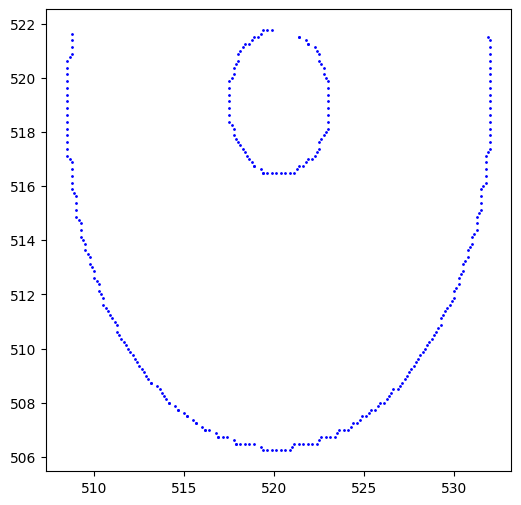

In [203]:
plot_critical_curve('tan_crit')

In [204]:
center_x_crit = df[0].mean()
center_y_crit = df[1].mean()
center_x_caust = df[2].mean()
center_y_caust = df[3].mean()

df['radius_crit'] = np.sqrt((df[0] - center_x_crit)**2 + (df[1] - center_y_crit)**2)
df['radius_caust'] = np.sqrt((df[2] - center_x_caust)**2 + (df[3] - center_y_caust)**2)

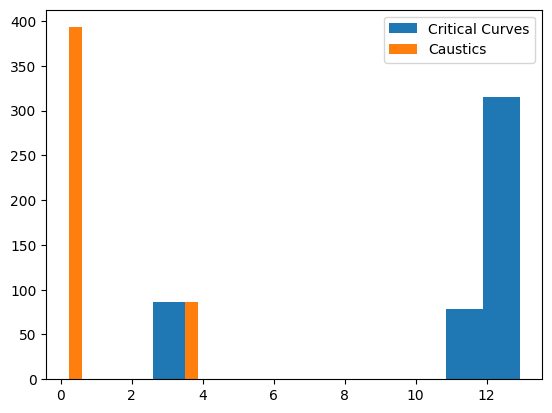

In [205]:
plt.hist(df['radius_crit'], bins=10, label='Critical Curves')
plt.hist(df['radius_caust'], bins=10, label='Caustics')
plt.legend()

In [206]:
caust_mean = df['radius_caust'].mean()
crit_mean = df['radius_crit'].mean()
mode1_caust = df[df['radius_caust'] < caust_mean]
mode2_caust = df[df['radius_caust'] > caust_mean]
mode1_crit = df[df['radius_crit'] < crit_mean]
mode2_crit = df[df['radius_crit'] > crit_mean]
std_crit = df['radius_crit'].std()
std_caust = df['radius_caust'].std()


In [207]:
mode1_crit_val = stats.mode(mode1_crit['radius_crit'])[0][0]
mode2_crit_val = stats.mode(mode2_crit['radius_crit'])[0][0]
mode1_caust_val = stats.mode(mode1_caust['radius_caust'])[0][0]
mode2_caust_val = stats.mode(mode2_caust['radius_caust'])[0][0]
print(mode1_crit_val, mode2_crit_val, mode1_caust_val, mode2_caust_val)

2.670599566326376 12.488206493222222 0.26575787835110737 3.6876970078167957


/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_82835/102030434.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode1_crit_val = stats.mode(mode1_crit['radius_crit'])[0][0]
/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_82835/102030434.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [208]:
# std_caust = df['radius_caust'].std()
# kde = stats.gaussian_kde(df['radius_caust'])
# x = np.linspace(df['radius_caust'].min(), df['radius_caust'].max(), 1000)
# y = kde(x)

# peaks_caust = []
# for i in range(1, len(x) - 1):
#     if y[i] > y[i-1] and y[i] > y[i+1]:
#         peaks_caust.append(x[i])

# print("Modes:", peaks_caust)

In [209]:
mask = (df['radius_crit'] > (mode1_crit_val - std_crit)) & (df['radius_crit'] < (mode1_crit_val + std_crit))
rad_crit = df[mask]
mask = (df['radius_crit'] > (mode2_crit_val - std_crit)) & (df['radius_crit'] < (mode2_crit_val + std_crit))
tan_crit = df[mask]
mask = (df['radius_caust'] > (mode1_caust_val - std_caust)) & (df['radius_caust'] < (mode1_caust_val + std_caust))
tan_caust = df[mask]
mask = (df['radius_caust'] > (mode2_caust_val - std_caust)) & (df['radius_caust'] < (mode2_caust_val + std_caust))
rad_caust = df[mask]


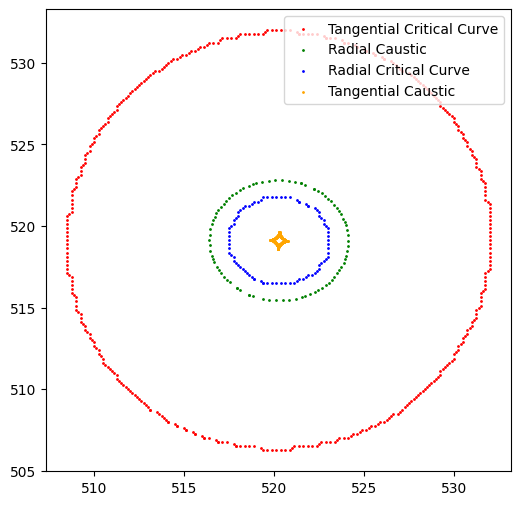

In [210]:
plt.figure(figsize=(6,6))
plt.scatter(tan_crit[0], tan_crit[1], s=1, color = 'red', label='Tangential Critical Curve')
plt.scatter(rad_caust[2], rad_caust[3], s=1, color = 'green', label='Radial Caustic')
plt.scatter(rad_crit[0], rad_crit[1], s=1, color = 'blue', label='Radial Critical Curve')
plt.scatter(tan_caust[2], tan_caust[3], s=1, color = 'orange', label='Tangential Caustic')
plt.legend()